# Prediction of Product Sales
Kassandra Doran

##Project Overview

## Load and Inspect Data

Insert code below the heading "Loading Data"
- Use Pandas to read the sales prediction data set into Google Colab.
- Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.


In [14]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

# Import required packages
import pandas as pd
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
fpath =("/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv")
df= pd.read_csv(fpath)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data
1) How many rows and columns?
  - There are 8523 rows and 12 columns

2) What are the datatypes of each variable?

- Item_Weight: float64
- Item_Fat_Content: object
- Item_Visibility: float64
- Item_Type: object
- Item_MRP: float64
- Outlet_Identifier: object
- Outlet_Establishment_Year: int64
- Outlet_Size: object
- Outlet_Location_Type: object
- Outlet_Type: object
-Item_Outlet_Sales: float64



3) Are there duplicates? If so, drop any duplicates.
  - There are no duplicates

4) Identify missing values.

5) Address the missing values by using a placeholder value.

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [3]:
#1 and #2
df.info()
# There are 8523 rows and 12 columns
# dtypes: float64(4), int64(1), object(7)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
#3) Are there duplicates? If so, drop any duplicates.

# Save a filter called "duplicated_rows" that identifies duplicated rows
duplicated_rows = df.duplicated()
duplicated_rows

# Get the sum of duplicated_rows filter to see the number of duplicate rows
df.duplicated().sum()

#there are no duplicates

0

In [5]:
#4 Idenitfy any missing values
null_sums = df.isna().sum()
null_sums


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
#5a save list of categorical column name. Size is an "object"
cat_cols = df.select_dtypes('object').columns
#Chaning missing values to "MISSING"
df[cat_cols] = df[cat_cols].fillna("MISSING")

In [7]:
#5b save list of numeric column name. Weight is an "float"
nums_cols = df.select_dtypes('float').columns
#Chaning missing values to "MISSING"
df[nums_cols] = df[nums_cols].fillna(-1)

In [8]:
#6 confirm there are no missing values
null_sums = df.isna().sum()
null_sums

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [9]:
#7) Find and fix any inconsistent categories of data
string_cols = df.select_dtypes("object").columns
string_cols
# Check the nunique for just the object cols
string_cols.nunique()
# Obtain the value counts for all string columns
string_cols.value_counts()

for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [10]:
#7a Item_Fact_Content has inconcsitencies
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("LF", "Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("low fat", "Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("reg", "Regular")
# Display the value counts again to confirm the change
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [11]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

df.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

- Histograms to view the distributions of numerical features in your dataset.
- Boxplots to view statistical summaries of numerical features in your dataset.
- Countplots to view the frequency of each class of categorial features in your dataset.
- Heatmap to view the correlation between features.


Text(0.5, 1.0, 'Heatmap of Product Sales')

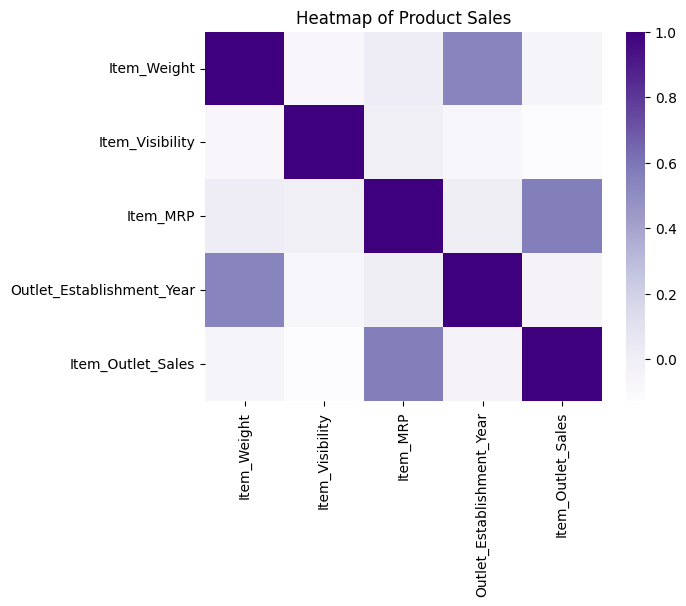

In [15]:
# Create heatmap to view correlations

# Find correlations
corr = df.corr(numeric_only = True)

# Make a heatmap using the correlations from above
corr.round(2)
ax1 = sns.heatmap(corr, cmap = 'Purples');
ax1.set_title("Heatmap of Product Sales")

There is a positive correlation betwen:
- Item MRP and Item outlet sales
- Outlet Establishment year and item weight

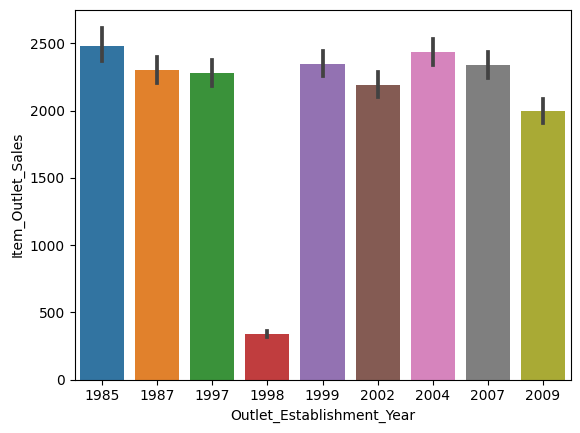

In [30]:
#Look at numeric correalations with barplot
ax1 = sns.barplot(data=df, x='Outlet_Establishment_Year', y="Item_Outlet_Sales")

The outlets that were established in 1998 has the lowest amount of sales by far.

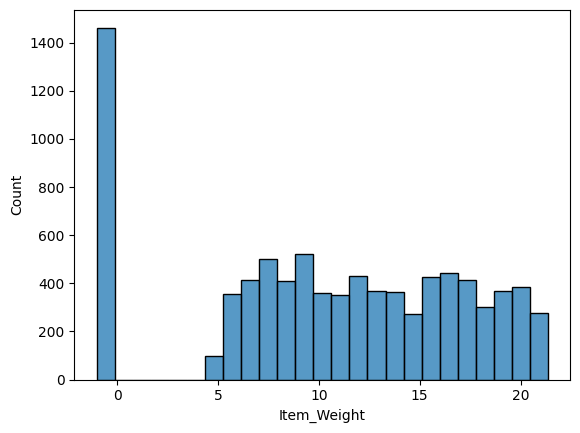

In [24]:
#Look at numeric correalations with historgrams
ax = sns.histplot(data=df, x='Item_Weight')


This histogram shows that there is a very week positively skewed distribution of items.

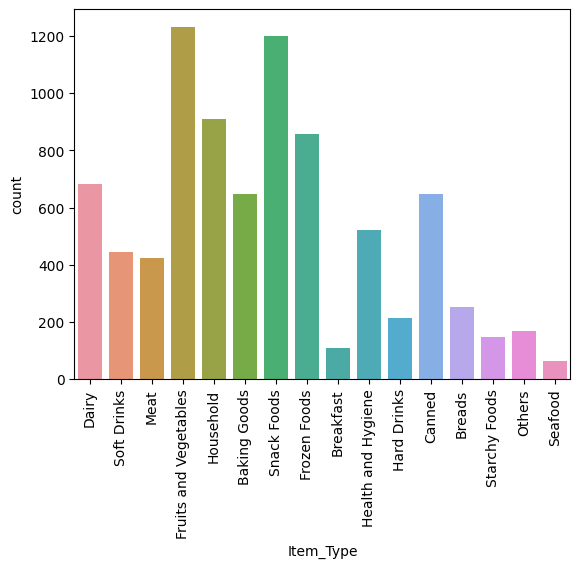

In [28]:
ax8 = sns.countplot(data=df, x="Item_Type")
ax8.tick_params(axis='x', rotation = 90);

The highest number of sales is fruits and vegtables and the second highest is snack foods. The lowest product sales is seafood.

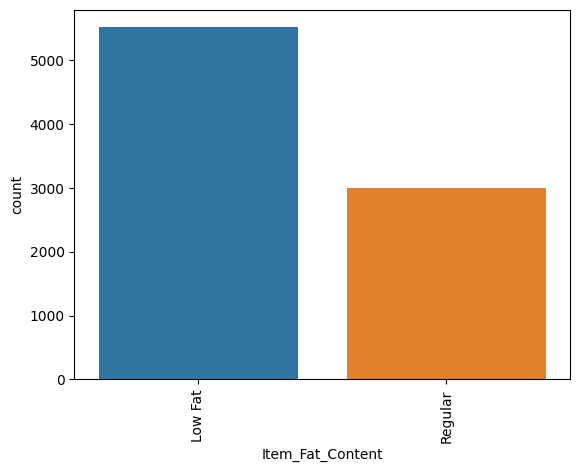

In [29]:
ax9 = sns.countplot(data=df, x="Item_Fat_Content")
ax9.tick_params(axis='x', rotation = 90);

There are more items with low fat than with regular fat

## Explanatory Data Analysis